In [137]:
#Importing libraries and loading a data file
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

data = pd.read_csv("titanic.tsv", sep="\t")
data

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,530,2,Hocking\t Mr. Richard George,male,23.0,2,1,29104,11.5000,NaN,S
1,0,466,3,Goncalves\t Mr. Manuel Estanslas,male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
2,0,753,3,Vande Velde\t Mr. Johannes Joseph,male,33.0,0,0,345780,9.5000,NaN,S
3,0,855,2,Carter\t Mrs. Ernest Courtenay (Lilian Hughes),female,44.0,1,0,244252,26.0000,NaN,S
4,0,333,1,Graham\t Mr. George Edward,male,38.0,0,1,PC 17582,153.4625,C91,S
...,...,...,...,...,...,...,...,...,...,...,...,...
618,0,660,1,Newell\t Mr. Arthur Webster,male,58.0,0,2,35273,113.2750,D48,C
619,1,85,2,Ilett\t Miss. Bertha,female,17.0,0,0,SO/C 14885,10.5000,NaN,S
620,1,521,1,Perreault\t Miss. Anne,female,30.0,0,0,12749,93.5000,B73,S
621,1,644,3,Foo\t Mr. Choong,male,NaN,0,0,1601,56.4958,NaN,S


CHECKING EACH UNIQUE VALUES IN COLUMNS TO FIND COLUMNS WHERE THERE ARE NULL VALUES

CHECKING UNIQUE VALUES IN SURVIVED COLUMN

In [138]:
Survived_values = list(pd.unique(data["Survived"]))
print("Survived values: ")
print(Survived_values)

Survived values: 
[0, 1]


CHECKING UNIQUE VALUES IN PASSENGERID COLUMN

In [139]:
PassengerId_values = list(pd.unique(data["PassengerId"]))
print("Passengerid values: ")
print(PassengerId_values)
print(len(PassengerId_values))

Passengerid values: 
[530, 466, 753, 855, 333, 39, 236, 303, 18, 505, 670, 316, 690, 718, 580, 697, 193, 634, 858, 329, 784, 407, 747, 492, 534, 862, 724, 685, 344, 751, 734, 496, 296, 516, 282, 218, 107, 878, 291, 722, 826, 434, 404, 210, 166, 201, 361, 53, 612, 60, 262, 674, 63, 215, 618, 789, 312, 113, 314, 517, 174, 803, 479, 445, 684, 597, 229, 121, 526, 360, 20, 28, 761, 487, 385, 364, 124, 165, 668, 596, 845, 510, 135, 196, 377, 745, 729, 661, 437, 9, 835, 794, 891, 851, 854, 552, 671, 228, 763, 591, 155, 104, 443, 592, 584, 277, 514, 83, 856, 390, 579, 500, 412, 687, 73, 887, 503, 41, 654, 484, 426, 438, 625, 114, 614, 731, 675, 712, 657, 848, 809, 577, 343, 252, 518, 515, 327, 144, 629, 469, 199, 459, 485, 349, 716, 742, 520, 764, 19, 563, 331, 251, 850, 778, 458, 457, 433, 743, 741, 234, 57, 816, 56, 169, 168, 158, 270, 243, 240, 177, 608, 587, 508, 648, 255, 602, 136, 464, 570, 126, 721, 31, 261, 621, 838, 68, 392, 450, 873, 11, 187, 795, 780, 509, 285, 34, 172, 447, 537, 38

CHECKING UNIQUE VALUES IN SEX COLUMN

In [140]:
Sex_values = list(pd.unique(data["Sex"]))
print("Sex values: ")
print(Sex_values)

Sex values: 
['male', 'female']


CHECKING UNIQUE VALUES IN PCLASS COLUMN

In [141]:
Pclass_values = list(pd.unique(data["Pclass"]))
print("Pclass values:")
print(Pclass_values)

Pclass values:
[2, 3, 1]


CHECKING UNIQUE VALUES IN AGE COLUMN

In [142]:
Age_values = list(pd.unique(data["Age"]))
print("Age values: ")
print(Age_values)

Age values: 
[23.0, 38.0, 33.0, 44.0, 18.0, nan, 19.0, 16.0, 26.0, 15.0, 27.0, 32.0, 51.0, 31.0, 21.0, 50.0, 60.0, 25.0, 4.0, 47.0, 28.0, 42.0, 17.0, 40.0, 9.0, 49.0, 11.0, 3.0, 45.0, 1.0, 22.0, 34.0, 14.0, 40.5, 35.0, 32.5, 36.0, 58.0, 20.5, 20.0, 52.0, 54.0, 24.0, 63.0, 29.0, 39.0, 61.0, 5.0, 65.0, 30.0, 56.0, 41.0, 48.0, 12.0, 6.0, 43.0, 66.0, 13.0, 62.0, 2.0, 10.0, 0.75, 70.0, 28.5, 70.5, 8.0, 57.0, 36.5, 0.92, 7.0, 55.0, 37.0, 53.0, 0.42, 74.0, 30.5, 64.0, 0.67, 34.5, 59.0, 55.5, 23.5, 46.0]


CHECKING UNIQUE VALUES IN SIBSP COLUMN

In [143]:
SibSp_values = list(pd.unique(data['SibSp']))
print("SibSp values: ")
print(SibSp_values)

SibSp values: 
[2, 0, 1, 5, 4, 3, 8]


CHECKING UNIQUE VALUES IN PARCH COLUMN

In [144]:
Parch_values = list(pd.unique(data["Parch"]))
print("Parch values: ")
print(Parch_values)

Parch values: 
[1, 0, 2, 4, 3, 5, 6]


CHECKING UNIQUE VALUES IN TICKET COLUMN

In [145]:
Ticket_values = list(pd.unique(data["Ticket"]))
print("Ticket values: ")
print(Ticket_values)
print("Ilość biletów: ")
print(len(Ticket_values))

Ticket values: 
['29104', 'SOTON/O.Q. 3101306', '345780', '244252', 'PC 17582', '345764', 'W./C. 6609', 'LINE', '244373', '110152', '19996', '347470', '24160', '34218', 'STON/O 2. 3101286', '363592', '350046', '112052', '113055', '363291', 'W./C. 6607', '347064', 'C.A. 2673', 'SOTON/OQ 3101317', '2668', '28134', '250643', '29750', '244361', '29103', '28425', '2627', 'PC 17612', '36967', '347464', '243847', '343120', '349212', '19877', '350048', '368323', 'STON/O 2. 3101274', 'STON/O2. 3101279', '112277', '345770', '347088', 'PC 17572', 'SOTON/O.Q. 3101305', 'CA 2144', '347077', '244270', '36973', '367229', 'A/5. 3336', 'C.A. 2315', 'PC 17608', '324669', '349243', 'C.A. 34260', 'STON/O 2. 3101280', '113760', '350060', '65306', '248727', '236171', 'S.O.C. 14879', '367232', '330980', '2649', '19950', '358585', '19943', '349227', 'SOTON/O.Q. 3101310', '27267', '3101295', '312993', '345773', '315090', '1601', 'C.A. 29178', 'PC 17569', 'C 7077', 'STON/O 2. 3101288', '236853', 'PC 17611', 'W.

CHECKING UNIQUE VALUES IN FARE COLUMN

In [146]:
Fare_values = list(pd.unique(data["Fare"]))
print("Fare values: ")
print(Fare_values)

Fare values: 
[11.5, 7.05, 9.5, 26.0, 153.4625, 18.0, 7.55, 0.0, 13.0, 86.5, 52.0, 7.8542, 211.3375, 10.5, 7.925, 8.05, 26.55, 20.525, 23.45, 7.75, 20.25, 7.25, 22.3583, 39.0, 23.0, 14.4583, 27.7208, 34.0208, 27.0, 7.65, 7.8958, 78.85, 7.0542, 6.95, 7.125, 15.85, 31.0, 27.9, 76.7292, 46.9, 31.3875, 83.475, 16.1, 20.575, 262.375, 120.0, 7.5208, 8.1125, 33.0, 73.5, 7.8792, 7.225, 263.0, 14.5, 90.0, 39.6875, 7.775, 24.15, 8.6625, 56.4958, 146.5208, 133.65, 34.375, 11.1333, 8.3, 30.6958, 31.275, 39.4, 7.2292, 7.3125, 8.6542, 78.2667, 40.125, 59.4, 7.7875, 9.35, 12.0, 7.7958, 6.8583, 7.6292, 9.475, 7.8292, 9.5875, 18.75, 9.825, 10.4625, 7.4958, 6.2375, 6.75, 7.725, 91.0792, 15.9, 13.5, 23.25, 89.1042, 12.475, 51.8625, 30.0, 35.5, 25.925, 135.6333, 12.275, 25.4667, 30.5, 15.0, 20.2125, 15.0458, 11.2417, 14.4542, 8.1583, 5.0, 16.7, 15.5, 22.525, 29.125, 19.5, 55.4417, 21.0, 30.0708, 49.5042, 9.8375, 19.9667, 19.2583, 65.0, 71.0, 8.85, 18.7875, 79.65, 76.2917, 15.2458, 26.25, 15.75, 39.6, 8.71

CHECKING UNIQUE VALUES IN CABIN COLUMN

In [147]:
Cabin_values = list(pd.unique(data["Cabin"]))
print("Cabin values: ")
print(Cabin_values)

Cabin values: 
[nan, 'C91', 'B79', 'C126', 'B5', 'E101', 'E17', 'D46', 'A31', 'D33', 'C83', 'B57 B59 B63 B66', 'F33', 'B96 B98', 'C23 C25 C27', 'C93', 'B80', 'D28', 'D20', 'A10', 'C124', 'G6', 'B49', 'F G73', 'C46', 'C92', 'D21', 'E38', 'D45', 'B102', 'C52', 'C99', 'A26', 'C104', 'B51 B53 B55', 'B3', 'A19', 'B38', 'E50', 'C106', 'C90', 'B22', 'E67', 'D15', 'D', 'D56', 'E12', 'C85', 'C95', 'C65', 'F E69', 'E77', 'D36', 'F2', 'E58', 'B37', 'E33', 'D17', 'C22 C26', 'C87', 'C70', 'C82', 'E44', 'C30', 'A7', 'D11', 'D26', 'B20', 'C103', 'E25', 'C125', 'D49', 'E36', 'B50', 'F4', 'D7', 'D10 D12', 'D6', 'B28', 'B4', 'E68', 'A16', 'C101', 'B30', 'B41', 'A20', 'D30', 'B69', 'C111', 'B94', 'A6', 'E24', 'B101', 'T', 'C110', 'B86', 'E10', 'B35', 'B71', 'A24', 'B18', 'F G63', 'C68', 'C7', 'C49', 'C32', 'D48', 'B73']


CHECKING UNIQUE VALUES IN EMBARKED COLUMN

In [148]:
Embarked_values = list(pd.unique(data['Embarked']))
print("Embarked values: ")
print(Embarked_values)

Embarked values: 
['S', 'C', 'Q', nan]


DELETING CABIN COLUMN SINCE IT CONTAINS A LARGE AMOUNT OF NAN VALUES

In [149]:
print("Number of rows before deleting NaN: " + str(len(data)))

print("Number of occurrences of NaN in the Cabin column: " + str(data["Cabin"].isna().sum()))

data = data.drop(["Cabin"], axis=1)
print(len(data))

Number of rows before deleting NaN: 623
Number of occurrences of NaN in the Cabin column: 486
623


In [150]:
# We remove the remaining NaN values, but we delete far fewer rows by removing the Cabin column sooner
data = data.dropna()
print(len(data))

# We remove unnecessary columns with text data Name and Ticket and Fare, since we don't want to use this column in model.
data = data.drop(["Name", "Ticket", "Fare"], axis=1)

498


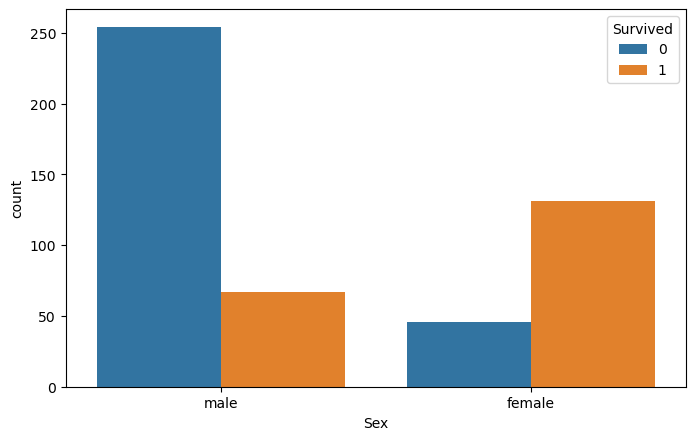

In [151]:
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(data=data, x='Sex', hue='Survived');

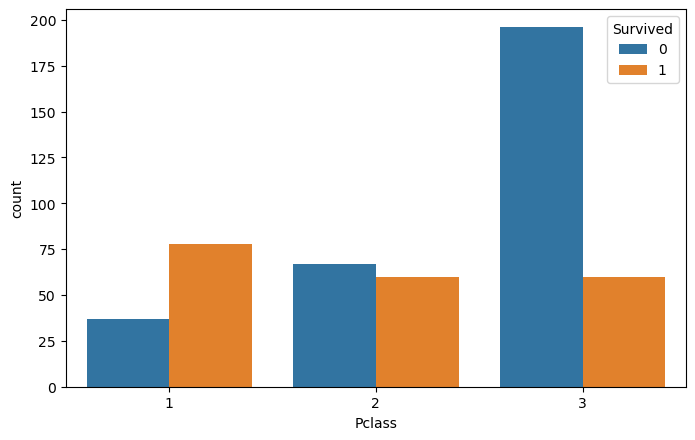

In [152]:
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(data=data, x='Pclass', hue='Survived');

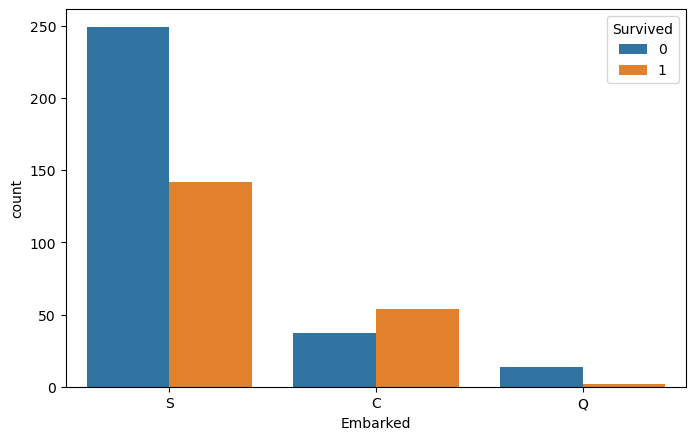

In [153]:
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(data=data, x='Embarked', hue='Survived');

Converting categorical variable into dummy/indicator variables.

In [154]:
data = pd.get_dummies(data, columns=["Pclass", "Sex", "Embarked"])
data

,Survived,PassengerId,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,530,23.0,2,1,0,1,0,0,1,0,0,1
1,0,466,38.0,0,0,0,0,1,0,1,0,0,1
2,0,753,33.0,0,0,0,0,1,0,1,0,0,1
3,0,855,44.0,1,0,0,1,0,1,0,0,0,1
4,0,333,38.0,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,1,609,22.0,1,2,0,1,0,1,0,1,0,0
618,0,660,58.0,0,2,1,0,0,0,1,1,0,0
619,1,85,17.0,0,0,0,1,0,1,0,0,0,1
620,1,521,30.0,0,0,1,0,0,1,0,0,0,1


We check if we have any Nan values

In [155]:
data.isnull().sum()

Survived       0
PassengerId    0
Age            0
SibSp          0
Parch          0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

We select features for our model, we divide the sets into training and test sets

In [156]:
FEATURES = [
    "Sex_female",
    "Sex_male",
    "Age",
    "Pclass_1",
    "Pclass_2",
    "Pclass_3",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S"
]

split_point = int(0.8*len(data))
data_train, data_test = train_test_split(data, test_size=0.2)

y_train = pd.DataFrame(data_train["Survived"])
x_train = pd.DataFrame(data_train[FEATURES])
x_test = pd.DataFrame(data_test[FEATURES])

model = LogisticRegression(max_iter=100)
model.fit(x_train, y_train.values.ravel())

print("Y_TRAIN SHAPE: ",  y_train.shape)
print("X_TRAIN SHAPE: ", x_train.shape)
print("X_TEST SHAPE:", x_test.shape)

Y_TRAIN SHAPE:  (398, 1)
X_TRAIN SHAPE:  (398, 9)
X_TEST SHAPE: (100, 9)


In [157]:
y_expected = pd.DataFrame(data_test["Survived"])
y_predicted = model.predict(x_test)
print(y_expected[:10])
print(y_predicted[:10])

     Survived
21          0
96          1
387         1
548         1
105         0
30          0
340         1
195         0
267         0
541         0
[0 1 1 1 0 0 1 0 0 0]


Classification evaluation using precision_recall_fscore_support

In [158]:
precision, recall, fscore, support = precision_recall_fscore_support(y_expected, y_predicted, average="micro")

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {fscore}")

score = model.score(x_test, y_expected)

print(f"Model score: {score}")

Precision: 0.8
Recall: 0.8
F-score: 0.8000000000000002
Model score: 0.8


Classification evaluation using classification_report

In [159]:
print(classification_report(y_expected, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        58
           1       0.81      0.69      0.74        42

    accuracy                           0.80       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.80      0.80      0.80       100

